In [1]:
import random
import re
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
random.seed(10)
file_path = './data/cmn.txt'
START_TOKEN = 'SOS'
END_TOKEN = 'EOS'

with open(file_path, 'r') as file:
    total_lines = sum(1 for line in file)

lines_to_read = int(1 * total_lines)

random_lines = random.sample(range(total_lines), lines_to_read)

en = []
cn = []
with open(file_path, 'r') as file:
    for line_number, line in enumerate(file):
        if line_number in random_lines:
            line = line.strip().split('\t')
            en.append(word_tokenize(line[0].lower()))
            cn.append([START_TOKEN] + word_tokenize(" ".join([w for w in line[1]])) + [END_TOKEN])

print(len(en))
print(len(cn))

print(en[201:206])
print(cn[201:206])

18167
18167
[['i', 'love', 'you', '.'], ['i', 'miss', 'you', '.'], ['i', 'need', 'you', '.'], ['i', 'think', 'so', '.'], ['i', 'use', 'this', '.']]
[['SOS', '我', '爱', '您', '。', 'EOS'], ['SOS', '我', '想', '念', '你', '。', 'EOS'], ['SOS', '我', '需', '要', '你', '。', 'EOS'], ['SOS', '我', '想', '是', '這', '樣', '的', '。', 'EOS'], ['SOS', '我', '使', '用', '这', '个', '。', 'EOS']]


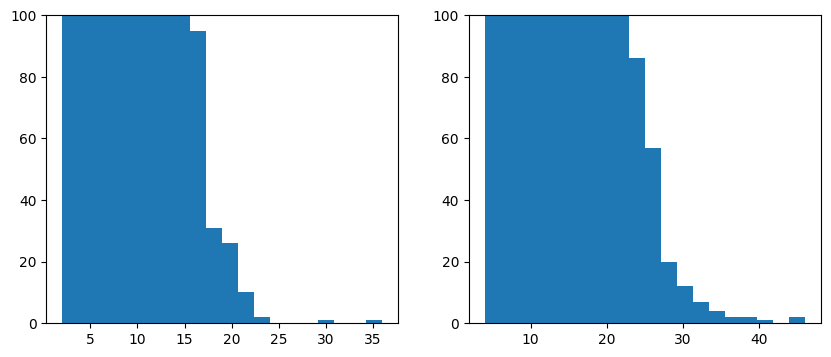

In [3]:
en_len = [len(s) for s in en]
cn_len = [len(s) for s in cn]
f, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(en_len, bins = 20)
axs[0].set(ylim=(0, 100))
axs[1].hist(cn_len, bins = 20)
axs[1].set(ylim=(0, 100))
plt.show()

#### filter sentences by max_sequence_length of 32

In [4]:
max_sequence_length = 32
valid_en = []
valid_cn = []
for i in range(len(en)):
    if len(en[i]) <= max_sequence_length and len(cn[i]) <= max_sequence_length:
        valid_en.append(en[i])
        valid_cn.append(cn[i])

In [10]:
en_all_tokens = []
for en_sentence in valid_en:
    for token in en_sentence:
        en_all_tokens.append(token)

en_token_counts = Counter(en_all_tokens)
en_common_tokens = en_token_counts.most_common(10000)
print(f"number of en tokens {len(en_common_tokens)}")
en_token_dict = {token: index for index, (token, _) in enumerate(en_common_tokens)}
en_token_dict['UNK'] = len(en_common_tokens)
en_token_dict['PAD'] = len(en_common_tokens) + 1

cn_all_tokens = []
for cn_sentence in valid_cn:
    for token in cn_sentence:
        cn_all_tokens.append(token)

cn_token_counts = Counter(cn_all_tokens)
cn_common_tokens = cn_token_counts.most_common(10000)
print(f"number of cn tokens {len(cn_common_tokens)}")
cn_token_dict = {token: index for index, (token, _) in enumerate(cn_common_tokens)}
cn_token_dict['UNK'] = len(cn_common_tokens)
cn_token_dict['PAD'] = len(cn_common_tokens) + 1

number of en tokens 6022
number of cn tokens 3354


In [24]:
en_tokenized = []
for en_sentence in valid_en:
    if len(en_sentence) < max_sequence_length:
        en_sentence = en_sentence + ['PAD'] * (max_sequence_length - len(en_sentence))
    en_tokenized.append([en_token_dict.get(token, en_token_dict['UNK']) for token in en_sentence])

cn_tokenized = []
for cn_sentence in valid_cn:
    if len(cn_sentence) < max_sequence_length:
        cn_sentence = cn_sentence + ['PAD'] * (max_sequence_length - len(cn_sentence))
    cn_tokenized.append([cn_token_dict.get(token, cn_token_dict['UNK']) for token in cn_sentence])

print(len(en_tokenized))
print(len(cn_tokenized))
print(cn_tokenized[1])

18153
18153
[0, 6, 33, 2, 1, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355, 3355]


In [40]:
# check if item is Chinese character
# cn_end_marks_filtered = []
# for item in cn_end_marks_set:
#     if not re.search("[\u4e00-\u9FFF]", item):
#         cn_end_marks_filtered.append(item)
# print(cn_end_marks_filtered)